In [1]:
#因為範例為1.X版本的程式,所以要降版
%tensorflow_version 1.x

import tensorflow as tf
tf.__version__

TensorFlow 1.x selected.


'1.15.2'

**数据准备：**

自变量：xdata，将0到1进行100等分所形成的等差数列

因变量：ydata，满足2*xdata + 1的线性关系

In [2]:
import numpy as np
import matplotlib.pyplot as plt

xdata = np.linspace(0,1,100)
ydata = 2 * xdata + 1
print(xdata)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

In [3]:
print(ydata)

[1.         1.02020202 1.04040404 1.06060606 1.08080808 1.1010101
 1.12121212 1.14141414 1.16161616 1.18181818 1.2020202  1.22222222
 1.24242424 1.26262626 1.28282828 1.3030303  1.32323232 1.34343434
 1.36363636 1.38383838 1.4040404  1.42424242 1.44444444 1.46464646
 1.48484848 1.50505051 1.52525253 1.54545455 1.56565657 1.58585859
 1.60606061 1.62626263 1.64646465 1.66666667 1.68686869 1.70707071
 1.72727273 1.74747475 1.76767677 1.78787879 1.80808081 1.82828283
 1.84848485 1.86868687 1.88888889 1.90909091 1.92929293 1.94949495
 1.96969697 1.98989899 2.01010101 2.03030303 2.05050505 2.07070707
 2.09090909 2.11111111 2.13131313 2.15151515 2.17171717 2.19191919
 2.21212121 2.23232323 2.25252525 2.27272727 2.29292929 2.31313131
 2.33333333 2.35353535 2.37373737 2.39393939 2.41414141 2.43434343
 2.45454545 2.47474747 2.49494949 2.51515152 2.53535354 2.55555556
 2.57575758 2.5959596  2.61616162 2.63636364 2.65656566 2.67676768
 2.6969697  2.71717172 2.73737374 2.75757576 2.77777778 2.79797

**变量初始化**

对于四个相关的tensorflow中使用到的变量进行如下设定：

其中X和Y用于上述训练输入数据的输入

In [4]:
X = tf.placeholder("float", name="X")
Y = tf.placeholder("float", name="Y")
W = tf.Variable(3., name="W")
B = tf.Variable(3., name="B")

**设定模型**

设定模型为X*W + B

In [5]:
linearmodel = tf.add(tf.multiply(X,W),B)

**损失函数**

loss function也被成为cost function，这里使用方差作为损失函数，用于确认期待值和计算值之间的差距

In [6]:
lossfunc = (tf.pow(Y - linearmodel, 2))

**Optimizer**

tensorflow的train中包含多种Optimizer，这里使用最为常用的梯度下降的优化器，以在不断的运算中调整参数的值。这里设定Learning Rate为0.01, 设定过小，收敛速度可能会很慢，但是过大反而可能会导致不收敛，需要根据具体情况进行调整

In [7]:
learningrate = 0.01
trainoperation = tf.train.GradientDescentOptimizer(learningrate).minimize(lossfunc)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**初期化Session**

进行训练之前，对session进行初期化

In [8]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

**进行训练**

In [9]:
print("caculation begins ...")
for j in range(100):
  for i in range(100):
    sess.run(trainoperation, feed_dict={X: xdata[i], Y:ydata[i]})

caculation begins ...


**结果展示**

使用scatter展示训练数据的分布状况，使用plot显示训练后数据

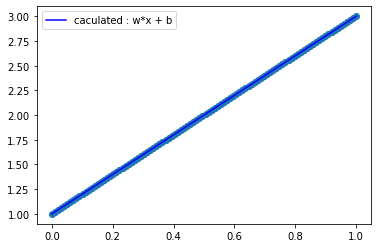

In [10]:
plt.scatter(xdata,ydata)
plt.plot(xdata,B.eval(session=sess)+W.eval(session=sess)*xdata,'b',label='caculated : w*x + b')
plt.legend()
plt.show()